<a href="https://colab.research.google.com/github/taismatozo/shepy/blob/main/Aula_5_analise_dados_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e visualização de dados - Top 50 músicas do Spotify 2019

Dados obtidos em: Kaggle.com/leonardopena/top50spotify2019

In [5]:
import pandas as pd


In [6]:
df = pd.read_csv('top50.csv', encoding = 'ISO-8859-1')
df.head(3)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


## Alterando o data frame para facilitar as análises

In [7]:
df.drop('Unnamed: 0' , inplace=True, axis=1)

In [11]:
df.rename(columns={'Track.Name': 'Track',
                   'Artist.Name': 'artist',
                   'Beats.Per.Minute': 'BPM',
                   'Loudness..dB': 'Loudness'}, inplace=True)

In [12]:
df.head()

,Track,artist,Genre,BPM,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


#Análise exploratória dos dados

In [13]:
df.shape #qtas linhas e quantas colunas

(50, 13)

In [15]:
df.describe()

,BPM,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Track           50 non-null     object
 1   artist          50 non-null     object
 2   Genre           50 non-null     object
 3   BPM             50 non-null     int64 
 4   Energy          50 non-null     int64 
 5   Danceability    50 non-null     int64 
 6   Loudness..dB..  50 non-null     int64 
 7   Liveness        50 non-null     int64 
 8   Valence.        50 non-null     int64 
 9   Length.         50 non-null     int64 
 10  Acousticness..  50 non-null     int64 
 11  Speechiness.    50 non-null     int64 
 12  Popularity      50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


## Analisando dados de gênero musical 

In [17]:
df['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [18]:
df['Genre'].nunique()

21

In [19]:
df['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
panamanian pop      2
country rap         2
canadian pop        2
dfw rap             2
brostep             2
electropop          2
reggaeton flow      2
reggaeton           2
r&b en espanol      1
boy band            1
australian pop      1
atl hip hop         1
escape room         1
big room            1
trap music          1
pop house           1
Name: Genre, dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Gêneros musicais')

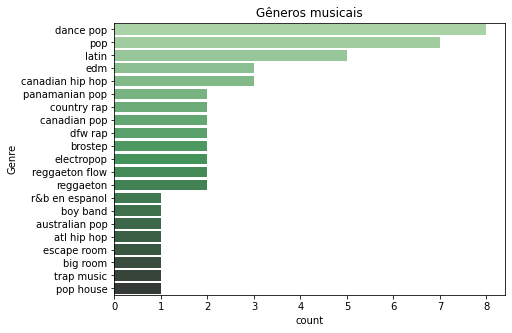

In [24]:
plt.figure(figsize=(7, 5)) #tamanho do gráfico

sns.countplot (y='Genre', #tipo do gráfico
    data=df, #biblioteca
    palette='Greens_d', #paleta de cores
    order=df['Genre'].value_counts().index).set_title("Gêneros musicais") #ordem das barras(value counts) e título (set title)

## Dados BPM

In [26]:
print(df['BPM'].min(), df['BPM'].max()) #valores mínimo e máximo de bpm

85 190


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


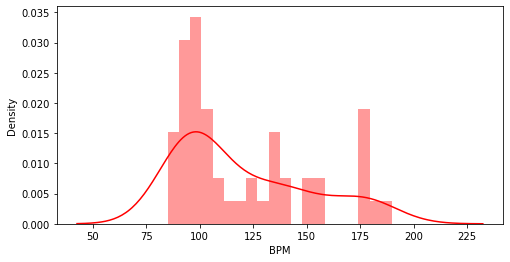

In [31]:
plt.figure(figsize=(8,4))
sns.distplot(df['BPM'], bins=20, color='red')

###Filtrando dados

In [33]:
df.query('BPM == 190')


,Track,artist,Genre,BPM,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [34]:
df.query('BPM == 85')

,Track,artist,Genre,BPM,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
30,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84
41,You Need To Calm Down,Taylor Swift,dance pop,85,68,77,-6,7,73,171,1,5,90


In [35]:
df.query('BPM >= 170 and Energy >= 60')

,Track,artist,Genre,BPM,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
13,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
16,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
46,Te Robaré,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88


#Dados de popularidade

In [36]:
df.query('Popularity == 95') #música mais popular, para saber o valor máx consultar a tabela 

,Track,artist,Genre,BPM,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


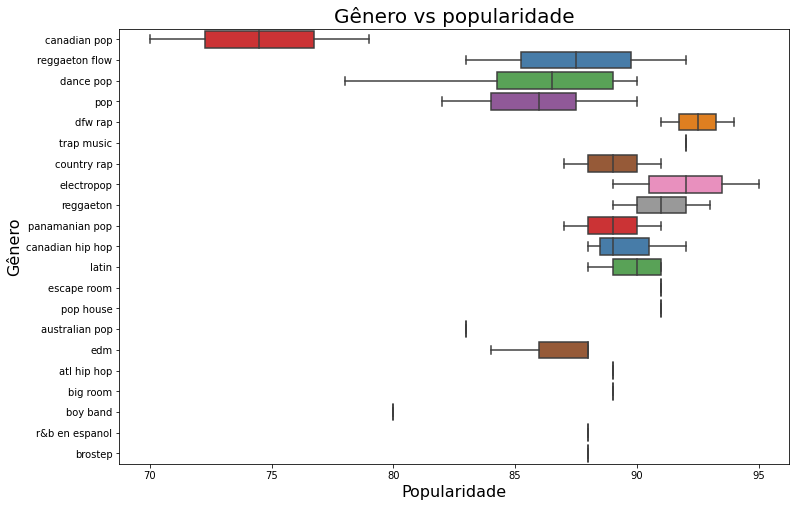

In [37]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Popularity', y='Genre', data=df, palette = 'Set1')

plt.xlabel('Popularidade', fontsize=16)
plt.ylabel('Gênero', fontsize=16)
plt.yticks(rotation='0')
plt.title("Gênero vs popularidade", fontsize=20)
plt.show()


In [38]:
#gerando um dataframe apenas com músicas com popularidade maior ou igual a 90
most_popular = df.query('Popularity >= 90') 
len(most_popular)

16

Text(0.5, 1.0, 'Gêneros musicais das 16 músicas mais populares')

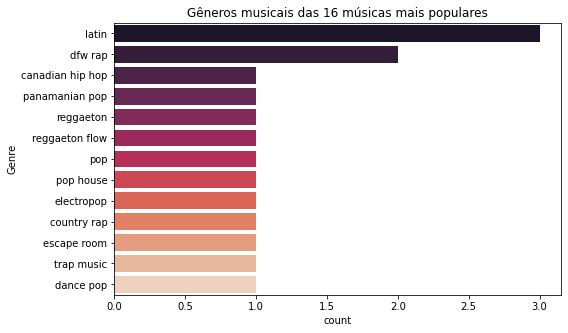

In [39]:
plt.figure(figsize=(8, 5))

sns.countplot(y='Genre', 
    data=most_popular, 
    palette='rocket', 
    order=most_popular['Genre'].value_counts().index).set_title("Gêneros musicais das 16 músicas mais populares")

##Correlação

Um coeficiente de correlação é uma medida numérica de algum tipo de correlação, significando uma relação estatística entre duas variáveis. O coeficiente de correlação assume valores na faixa de -1 a +1, em que +1 indica forte correlação positiva, -1 forte correlação negativa e 0 uma situação onde não há correlação entre as variáveis.

In [40]:
df.head(3)

,Track,artist,Genre,BPM,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [42]:
#Analisando correlação apenas das colunas de dados numéricos
corr = df.loc[:, 'BPM': 'Popularity'].corr()
corr

,BPM,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
BPM,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


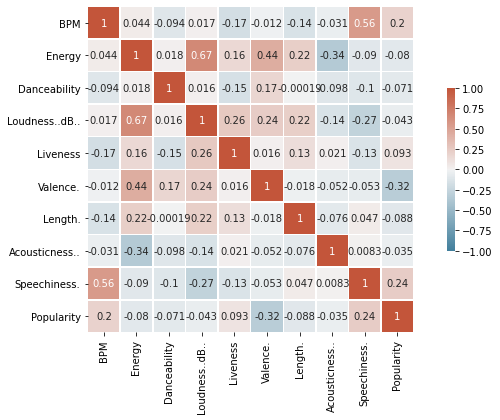

In [43]:
plt.figure(figsize=(12, 6))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

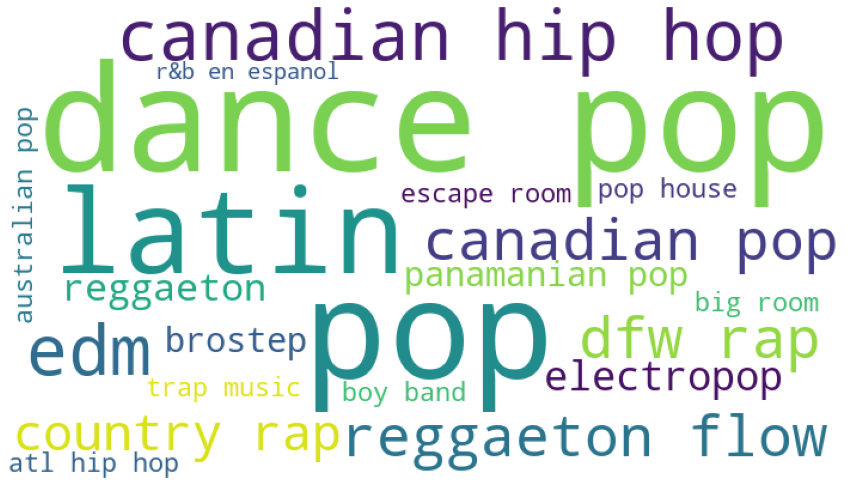

In [46]:
from wordcloud import WordCloud
from collections import Counter
allSongs = [trackname for trackname in df['Genre']]
wc_dict = Counter(allSongs)

wordcloud = WordCloud(width=700, height=400, background_color = 'white').generate_from_frequencies(wc_dict)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off');
